# Lab Session 8: Implementing Markowitz 

In [1]:
import pandas as pd
import edhec_risk_kit as erk
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind ["1996":"2000"].cov()

In [ ]:
''' New function, minimize negative sharpe ratio to find the maximum sharpe ratio portfolio 

from scipy.optimize import minimize
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n,n)
    bounds = ((0.0,1.0),)*n # create a tuple of n-subtuples
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights)- 1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        returns the negative of the sharpe ratio, given weights
        """
        r = portfolio_return(weight,er)
        vol = portfolio_vol(weight,cov)
        return -(r - riskfree_rate)/vol
    weights = minimize(neg_sharpe_ratio, init_guess,
                      args=(cov,), method="SLSQP",
                      options={'disp':False},
                      constraints =(weights_sum_to_1),
                      bounds=bounds)
    return weights.x
    
'''

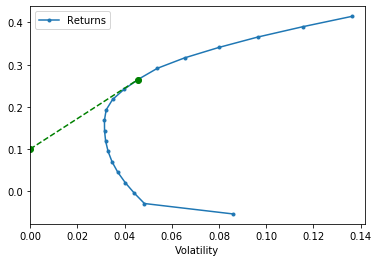

In [18]:
ax = erk.plot_ef(20,er,cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = erk.msr(rf,er,cov)
r_msr = erk.portfolio_return(w_msr,er)
vol_msr = erk.portfolio_vol(w_msr,cov)
# Add CML
cml_x = [0,vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker = "o", linestyle = "dashed")

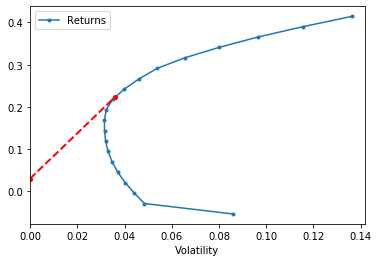

In [21]:
erk.plot_ef(20,er,cov,show_cml=True, riskfree_rate = 0.03)

## Lack of Robusness of the Markowitz Procedure and the GMV

In [22]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"],12)
cov = ind ["1996":"2000"].cov()

In [24]:
l = ["Food","Steel"]
erk.msr(0.1,er[l],cov.loc[l,l])

array([0.75040363, 0.24959637])

In [34]:
er[l].round(5)*100

Food     11.680
Steel    11.581
dtype: float64

In [37]:
erk.msr(0.1, np.array([0.11,0.12]) ,cov.loc[l,l])

array([0.57930354, 0.42069646])

In [39]:
erk.msr(0.1, np.array([0.10,0.13]) ,cov.loc[l,l])

array([0., 1.])

In [40]:
erk.msr(0.1, np.array([0.13,0.10]) ,cov.loc[l,l])

array([1., 0.])

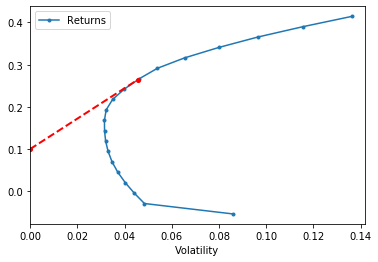

In [41]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1)

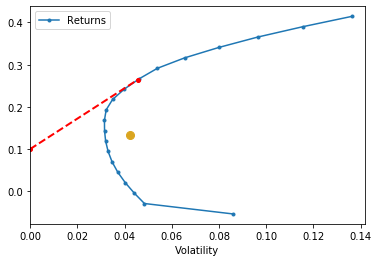

In [42]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1, show_ew=True)

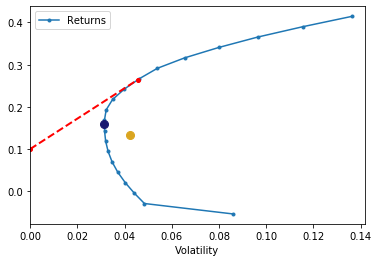

In [49]:
erk.plot_ef(20,er,cov,show_cml=True,riskfree_rate=0.1, show_ew=True, show_gmw=True)